Automatically created module for IPython interactive environment


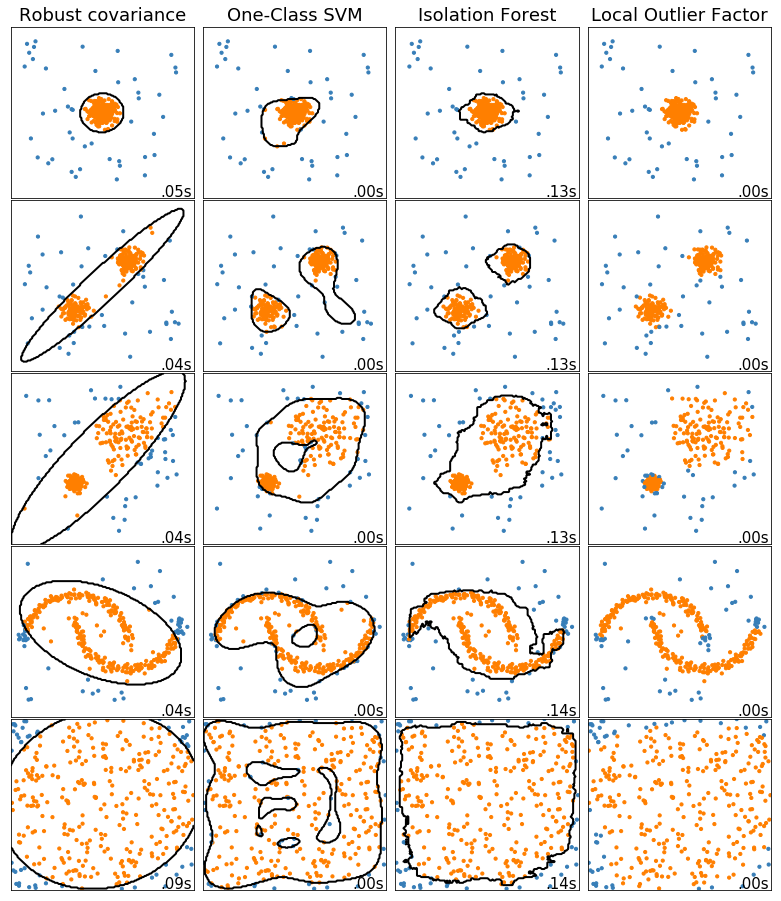

In [2]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#         Albert Thomas <albert.thomas@telecom-paristech.fr>
# License: BSD 3 clause

import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

print(__doc__)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'        

# Example settings
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)),
    ("Isolation Forest", IsolationForest(behaviour='new',
                                         contamination=outliers_fraction,
                                         random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(
        n_neighbors=35, contamination=outliers_fraction))]

# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5],
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3],
               **blobs_params)[0],
    4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -
          np.array([0.5, 0.25])),
    14. * (np.random.RandomState(42).rand(n_samples, 2) - 0.5)]

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 150),
                     np.linspace(-7, 7, 150))

plt.figure(figsize=(len(anomaly_algorithms) * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
rng = np.random.RandomState(42)

for i_dataset, X in enumerate(datasets):
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6,
                       size=(n_outliers, 2))], axis=0)

    for name, algorithm in anomaly_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

        # plot the levels lines and the points
        if name != "Local Outlier Factor":  # LOF does not implement predict
            Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

        colors = np.array(['#377eb8', '#ff7f00'])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

In [6]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.neighbors import LocalOutlierFactor
%matplotlib inline

In [30]:
# Generate train data
X = 0.3 * np.random.randn(100, 2)
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X + 2, X - 2, X_outliers]

In [31]:
X

array([[ 2.33517187,  2.26592619],
       [ 2.03561186,  2.03315356],
       [ 1.70754447,  1.56035452],
       [ 2.07262288,  1.41291392],
       [ 2.10765315,  2.33096759],
       [ 2.20788809,  1.86092372],
       [ 1.83517404,  2.42377723],
       [ 1.7429688 ,  1.58949179],
       [ 1.60283556,  1.93256033],
       [ 1.93717764,  1.75214656],
       [ 1.60527035,  1.94096963],
       [ 1.96203711,  2.00780211],
       [ 1.85498542,  1.71835433],
       [ 1.96876848,  1.82566587],
       [ 2.0895728 ,  2.23368687],
       [ 1.65196189,  1.43136076],
       [ 2.04186509,  2.02951913],
       [ 1.87368084,  2.28068266],
       [ 1.6781833 ,  2.34287875],
       [ 1.44627958,  2.1898492 ],
       [ 1.83898583,  1.56301469],
       [ 2.29512977,  1.58224666],
       [ 2.21978551,  1.69002167],
       [ 1.49059018,  2.13987738],
       [ 2.30281076,  1.63692669],
       [ 1.2964377 ,  1.92073617],
       [ 1.21499058,  2.0421307 ],
       [ 2.5254787 ,  2.02684341],
       [ 1.46142346,

In [118]:
# fit the model
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(X)

C:\Users\Geeks Data\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


In [119]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

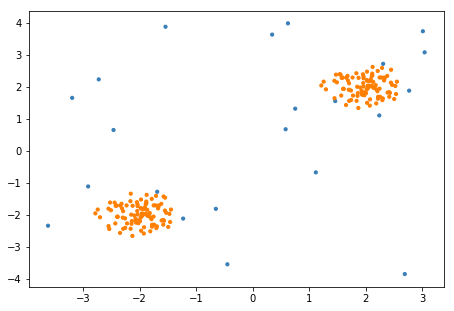

In [36]:
colors = np.array(['#377eb8', '#ff7f00'])
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,hspace=.01)
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

In [19]:
from sklearn.mixture import GaussianMixture

In [37]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [38]:
y_pred = gmm.predict(X)

C:\Users\Geeks Data\Anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


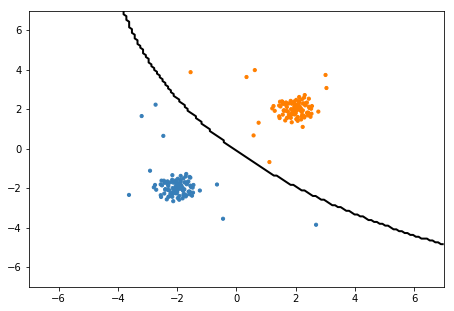

In [43]:
Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
colors = np.array(['#377eb8', '#ff7f00'])
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,hspace=.01)
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

In [46]:
from sklearn.ensemble import IsolationForest

In [47]:
alg = IsolationForest(behaviour='new', contamination=outliers_fraction, random_state=42)

In [48]:
alg.fit(X)

IsolationForest(behaviour='new', bootstrap=False, contamination=0.15,
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=42, verbose=0)

In [49]:
y_pred = alg.predict(X)

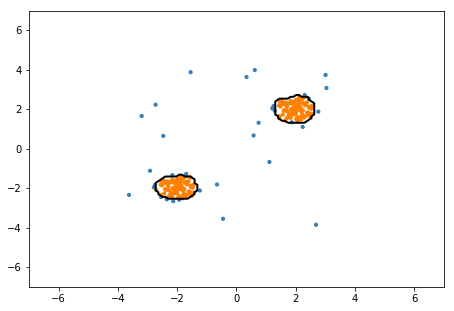

In [50]:
Z = alg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
colors = np.array(['#377eb8', '#ff7f00'])
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,hspace=.01)
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

#### Scaling for LOF

In [117]:
from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing

In [65]:
X

array([[ 2.33517187,  2.26592619],
       [ 2.03561186,  2.03315356],
       [ 1.70754447,  1.56035452],
       [ 2.07262288,  1.41291392],
       [ 2.10765315,  2.33096759],
       [ 2.20788809,  1.86092372],
       [ 1.83517404,  2.42377723],
       [ 1.7429688 ,  1.58949179],
       [ 1.60283556,  1.93256033],
       [ 1.93717764,  1.75214656],
       [ 1.60527035,  1.94096963],
       [ 1.96203711,  2.00780211],
       [ 1.85498542,  1.71835433],
       [ 1.96876848,  1.82566587],
       [ 2.0895728 ,  2.23368687],
       [ 1.65196189,  1.43136076],
       [ 2.04186509,  2.02951913],
       [ 1.87368084,  2.28068266],
       [ 1.6781833 ,  2.34287875],
       [ 1.44627958,  2.1898492 ],
       [ 1.83898583,  1.56301469],
       [ 2.29512977,  1.58224666],
       [ 2.21978551,  1.69002167],
       [ 1.49059018,  2.13987738],
       [ 2.30281076,  1.63692669],
       [ 1.2964377 ,  1.92073617],
       [ 1.21499058,  2.0421307 ],
       [ 2.5254787 ,  2.02684341],
       [ 1.46142346,

In [86]:
X1 = X[:100]

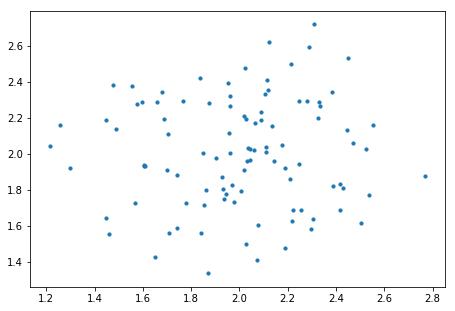

In [91]:
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,hspace=.01)
plt.scatter(X1[:, 0], X1[:, 1], s=10)

In [92]:
V = preprocessing.normalize(X1, norm='l2')

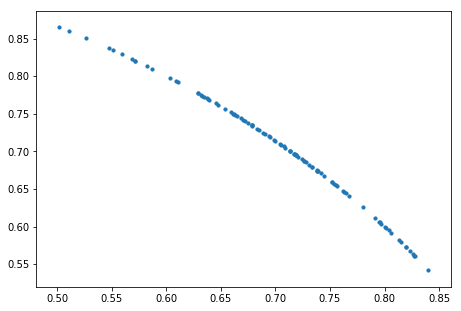

In [94]:
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,hspace=.01)
plt.scatter(V[:, 0], V[:, 1], s=10)

In [95]:
scaler = preprocessing.StandardScaler().fit(X1)

In [96]:
Y = scaler.transform(X1)

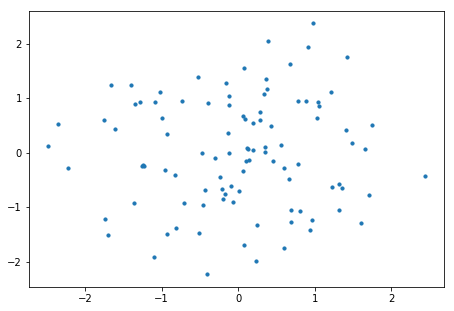

In [98]:
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)
plt.scatter(Y[:, 0], Y[:, 1], s=10)

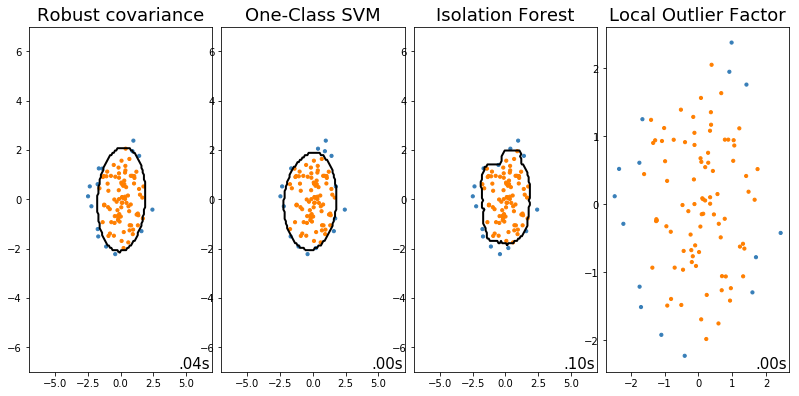

In [114]:
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)),
    ("Isolation Forest", IsolationForest(behaviour='new',
                                         contamination=outliers_fraction,
                                         random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(
        n_neighbors=35, contamination=outliers_fraction))]

plt.figure(figsize=(len(anomaly_algorithms) * 2 + 3, 5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,hspace=.01)
plot_num = 1

for name, algorithm in anomaly_algorithms:
    t0 = time.time()
    algorithm.fit(X)
    t1 = time.time()
    plt.subplot(1, len(anomaly_algorithms), plot_num)
    plt.title(name, size=18)
    # fit the data and tag outliers
    if name == "Local Outlier Factor":
        y_pred = algorithm.fit_predict(Y)
    else:
        y_pred = algorithm.fit(Y).predict(Y)

    # plot the levels lines and the points
    if name != "Local Outlier Factor":  # LOF does not implement predict
        Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

    colors = np.array(['#377eb8', '#ff7f00'])
    plt.scatter(Y[:, 0], Y[:, 1], s=10, color=colors[(y_pred + 1) // 2])

    plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),transform=plt.gca().transAxes, size=15, horizontalalignment='right')
    plot_num += 1

plt.show()

In [116]:
from pyod.models.knn import KNN